# Split Cycle - Examples

This notebook contains examples from the paper "[Split Cycle: A New Condorcet Consistent Voting Method Independent of Clones and Immune to Spoilers](https://arxiv.org/abs/2004.02350)" by Wesley H. Holliday and Eric Pacuit.  


In [7]:
from pref_voting.profiles import *
from pref_voting.generate_profiles import *
from pref_voting.voting_methods import *
from itertools import chain, combinations, permutations

## Notation

Refer to our paper for details about the terminology and notation. 


In [8]:

# define some variables to simplify notation 
a = 0
b = 1
c = 2
d = 3
e = 4
f = 5
g = 6

# map candidate names to letters to match the notation in our papaer
cmap_abc     = {a:"a", b:"b", c:"c"}
cmap_abcd    = {a:"a", b:"b", c:"c", d:"d"}
cmap_abcde   = {a:"a", b:"b", c:"c", d:"d", e:"e"}
cmap_abcdef  = {a:"a", b:"b", c:"c", d:"d", e:"e", f:"f"}
cmap_abcdefg = {a:"a", b:"b", c:"c", d:"d", e:"e", f:"f", g:"g"}


# used to display lists of candidates using a cmap
display_cands = lambda cs, cmap: "{" + ', '.join([cmap[c] for c in cs]) + "}"

# powerset function needed to 
def powerset(iterable):
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))


## Ranked Pairs violates positive and negative involvement

The following examples from p. 612 of J. Perez, "The Strong No Show Paradoxes are a common flaw in Condorcet voting correspondences", https://link.springer.com/article/10.1007/s003550000079 shows that Ranked Pairs violates postive and negative involvement. 

+---+---+---+---+---+---+
| 4 | 3 | 3 | 2 | 1 | 1 |
+---+---+---+---+---+---+
| d | a | b | a | c | a |
| c | c | d | b | b | b |
| b | b | a | d | a | c |
| a | d | c | c | d | d |
+---+---+---+---+---+---+


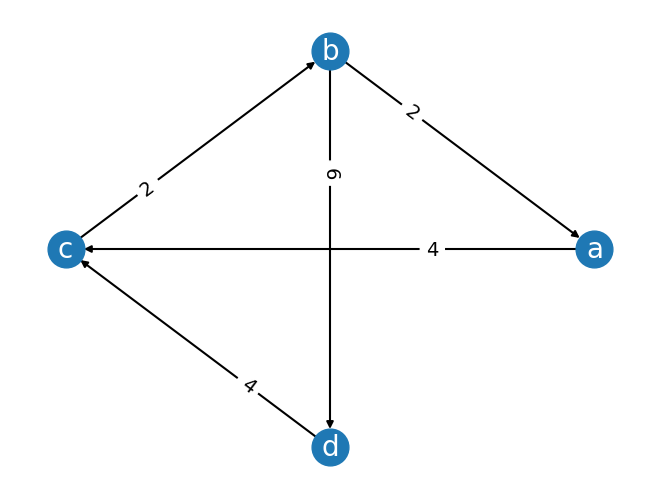

Ranked Pairs winner is {b}

Add a voter with the ranking c d b a

+---+---+---+---+---+---+---+
| 4 | 3 | 3 | 2 | 1 | 1 | 1 |
+---+---+---+---+---+---+---+
| d | a | b | a | c | a | c |
| c | c | d | b | b | b | d |
| b | b | a | d | a | c | b |
| a | d | c | c | d | d | a |
+---+---+---+---+---+---+---+


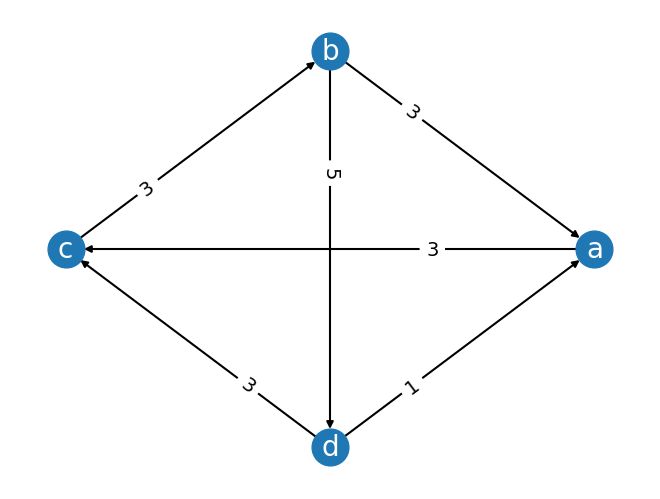

Ranked Pairs winners are {a, b, c}

So, Ranked Pairs violates negative involvement:
a is ranked last by the new voter, a does not win in the first profile, but is a is a winner in the second profile.

Now, add a voter with the ranking a b d c to the above profile
+---+---+---+---+---+---+---+---+
| 4 | 3 | 3 | 2 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+---+---+---+
| d | a | b | a | c | a | c | a |
| c | c | d | b | b | b | d | b |
| b | b | a | d | a | c | b | d |
| a | d | c | c | d | d | a | c |
+---+---+---+---+---+---+---+---+


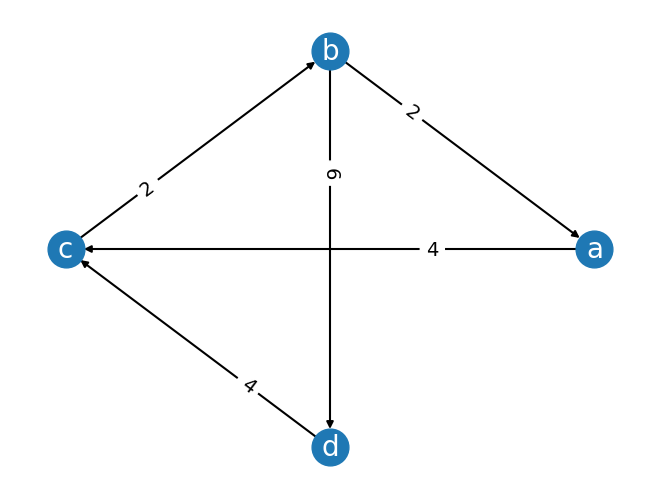

Ranked Pairs winner is {b}

So, Ranked Pairs violates positive involvement:
a is ranked first by the new voter, a is a winner in the second profile, but is a is not a winner in the third profile.


In [9]:
prof0 = Profile(
    [
        [d, c, b, a],
        [a, c, b, d],
        [b, d, a, c], 
        [a, b, d, c], 
        [c, b, a, d], 
        [a, b, c, d] 
    ],
    [4, 3, 3, 2, 1, 1], 
    cmap = cmap_abcd
)

prof0.display()
prof0.display_margin_graph()
ranked_pairs.display(prof0)

v1 = [c, d, b, a]

print(f"\nAdd a voter with the ranking c d b a\n")
prof1 = Profile(
    [
        [d, c, b, a],
        [a, c, b, d],
        [b, d, a, c], 
        [a, b, d, c], 
        [c, b, a, d], 
        [a, b, c, d] 
    ] + [v1],
    [4, 3, 3, 2, 1, 1] + [1], 
    cmap = cmap_abcd
)

prof1.display()
prof1.display_margin_graph()
ranked_pairs.display(prof1)

print("\nSo, Ranked Pairs violates negative involvement:")
print("a is ranked last by the new voter, a does not win in the first profile, but is a is a winner in the second profile.")

v2 = [a, b, d, c]

print(f"\nNow, add a voter with the ranking a b d c to the above profile")

prof2 = Profile(
    [
        [d, c, b, a],
        [a, c, b, d],
        [b, d, a, c], 
        [a, b, d, c], 
        [c, b, a, d], 
        [a, b, c, d] 
    ] + [v1] + [v2],
    [4, 3, 3, 2, 1, 1] + [1] + [1], 
    cmap = cmap_abcd
)

prof2.display()
prof2.display_margin_graph()
ranked_pairs.display(prof2)

print("\nSo, Ranked Pairs violates positive involvement:")
print("a is ranked first by the new voter, a is a winner in the second profile, but is a is not a winner in the third profile.")




## Beat Path violates positive and negative involvement

Example 7 from M. Schulze, "The Schulze Method of Voting", https://arxiv.org/pdf/1804.02973v11 is an example of a single profile and voter that shows Beat Path violates both positive and negative involvement. 



+---+---+---+---+---+---+---+
| 3 | 3 | 4 | 1 | 4 | 2 | 2 |
+---+---+---+---+---+---+---+
| a | b | c | d | d | e | f |
| d | f | a | b | e | c | a |
| e | e | b | c | f | b | c |
| b | c | f | e | a | d | d |
| c | d | d | f | b | f | b |
| f | a | e | a | c | a | e |
+---+---+---+---+---+---+---+
Beat Path winner is {a}


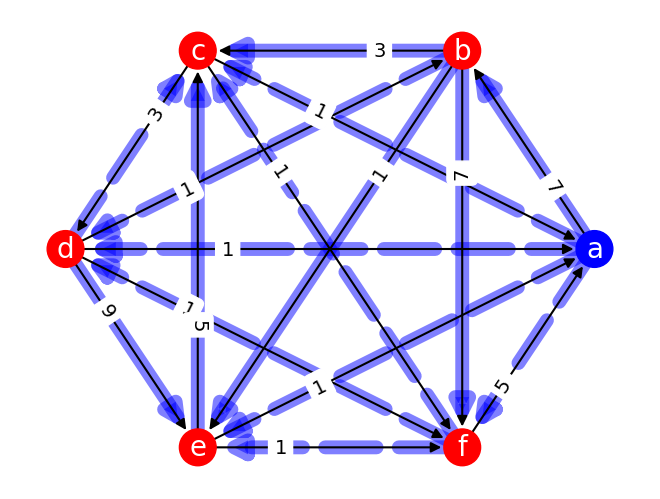


2 voters are added with the ranking a e f c b d

+---+---+---+---+---+---+---+---+
| 3 | 3 | 4 | 1 | 4 | 2 | 2 | 2 |
+---+---+---+---+---+---+---+---+
| a | b | c | d | d | e | f | a |
| d | f | a | b | e | c | a | e |
| e | e | b | c | f | b | c | f |
| b | c | f | e | a | d | d | c |
| c | d | d | f | b | f | b | b |
| f | a | e | a | c | a | e | d |
+---+---+---+---+---+---+---+---+
Beat Path winner is {d}


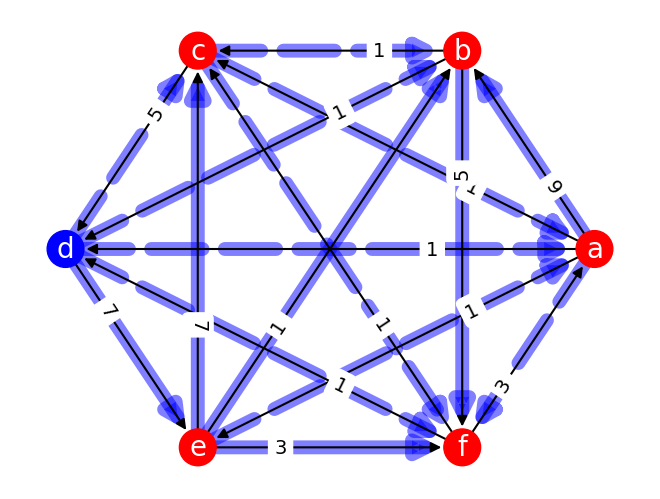

In [10]:
## 
prof = Profile(
    [
        [a, d, e, b, c, f],
        [b, f, e, c, d, a], 
        [c, a, b, f, d, e],
        [d, b, c, e, f, a],
        [d, e, f, a, b, c],
        [e, c, b, d, f, a],
        [f, a, c, d, b, e]
    ],
    rcounts = [3, 3, 4, 1, 4, 2, 2],
    cmap = cmap_abcdef)

prof.display()


beat_path.display(prof, algorithm="floyd_warshall")

prof.display_margin_graph_with_defeat(beat_path_defeat(prof))

print("\n2 voters are added with the ranking a e f c b d\n")
new_prof = Profile(
    [
        [a, d, e, b, c, f],
        [b, f, e, c, d, a], 
        [c, a, b, f, d, e],
        [d, b, c, e, f, a],
        [d, e, f, a, b, c],
        [e, c, b, d, f, a],
        [f, a, c, d, b, e],
    ] + [[a, e, f, c, b, d]],
    rcounts = [3, 3, 4, 1, 4, 2, 2] + [2],
    cmap = cmap_abcdef)

new_prof.display()


beat_path.display(new_prof, algorithm="floyd_warshall")

new_prof.display_margin_graph_with_defeat(beat_path_defeat(new_prof))


## Copeland violates immunity to stealers

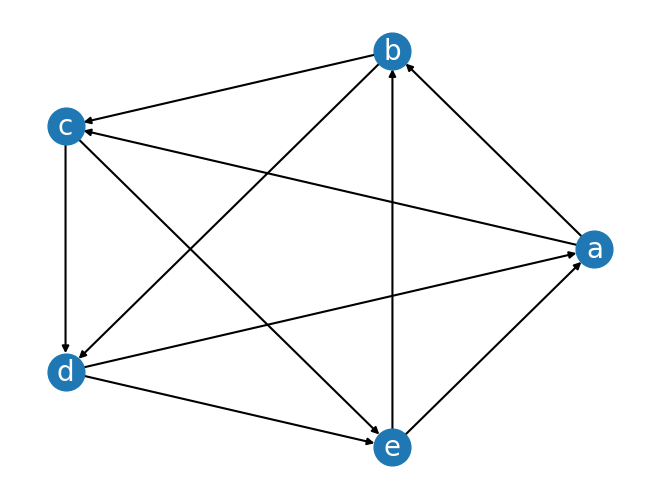

Copeland winners are {a, b, c, d, e}


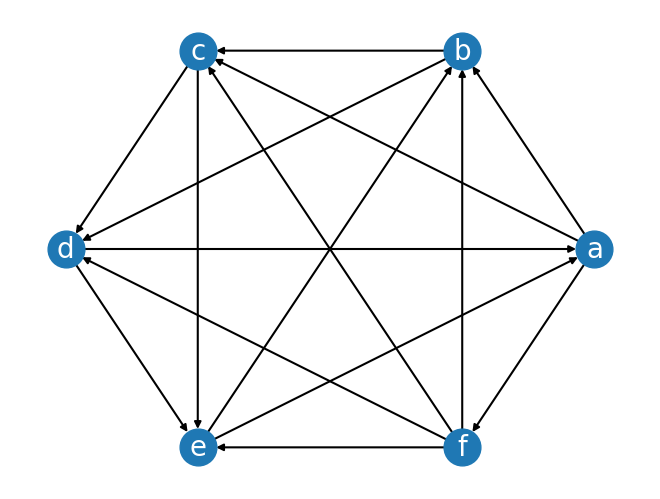


a is a Copeland winner in the majority graph with 5 candidates; 
a is majority preferred to f in the majority graph with 6 candidates; 
in the graph with 6 candidates, a is not a Copeland winner but f is a Copeland winner.

Copeland winner is {f}


In [11]:
mg = MajorityGraph(
    [a, b, c, d, e], 
    [
        (a, b), 
        (a, c), 
        (b, c),
        (b, d), 
        (c, d), 
        (c, e), 
        (d, e), 
        (d, a),
        (e, a), 
        (e, b)
    ], 
    cmap=cmap_abcde)

mg.display()

copeland.display(mg)

mg_new = MajorityGraph(
    [a, b, c, d, e, f], 
    [
        (a, b), 
        (a, c), 
        (b, c),
        (b, d), 
        (c, d), 
        (c, e), 
        (d, e), 
        (d, a),
        (e, a), 
        (e, b),
        (a, f), 
        (f, b), 
        (f, c), 
        (f, d), 
        (f, e)
    ], 
    cmap=cmap_abcdef)

mg_new.display()

print("""
a is a Copeland winner in the majority graph with 5 candidates; 
a is majority preferred to f in the majority graph with 6 candidates; 
in the graph with 6 candidates, a is not a Copeland winner but f is a Copeland winner.
""")
copeland.display(mg_new)


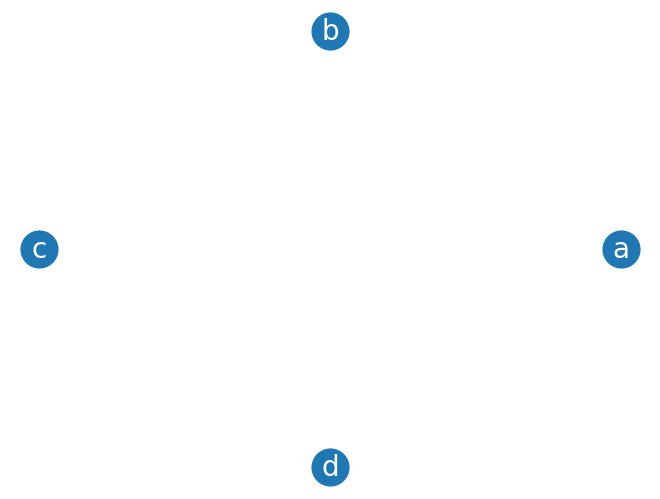

Copeland winners are {a, b, c, d}


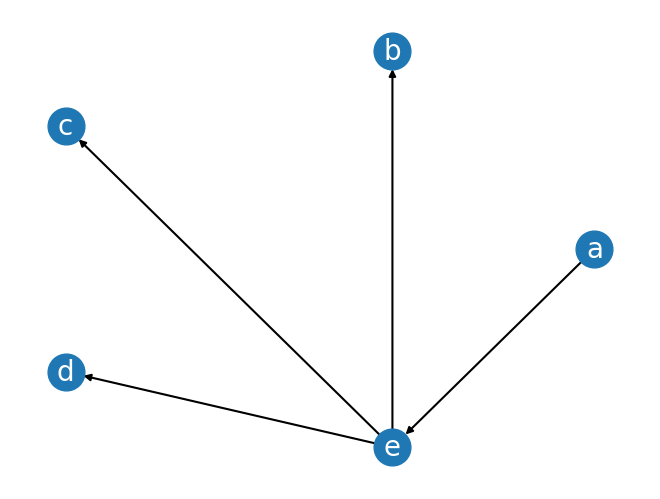

Copeland winner is {e}

a is a Copeland winner in the majority graph with 4 candidates; 
a is majority preferred to e in the majority graph with 5 candidates; 
in the graph with 5 candidates, a is not a Copeland winner but e is a Copeland winner.



In [12]:
mg = MajorityGraph(
    [a, b, c, d], 
    [], 
    cmap=cmap_abcd)

mg.display()

copeland.display(mg)

mg_new = MajorityGraph(
    [a, b, c, d, e], 
    [
        (a, e), 
        (e, b), 
        (e, c),
        (e, d)
    ], 
    cmap=cmap_abcde)

mg_new.display()

copeland.display(mg_new)

print("""
a is a Copeland winner in the majority graph with 4 candidates; 
a is majority preferred to e in the majority graph with 5 candidates; 
in the graph with 5 candidates, a is not a Copeland winner but e is a Copeland winner.
""")


## Example C.4 - Copeland violates stability for winners with tiebreaking

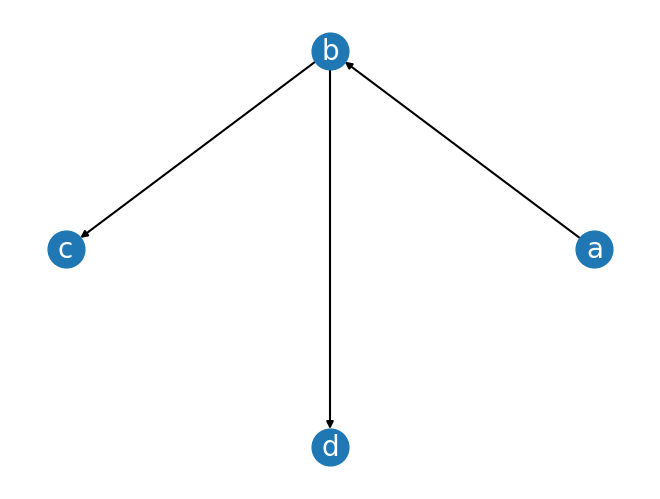

Copeland winners are {a, b}
a is the unique Condorcetian candidate for Copeland, but b is a winner

Without a in the election, the Copeland winner is {b}
Without b in the election, the Copeland winners are {a, c, d}
Without c in the election, the Copeland winner is {a}
Without d in the election, the Copeland winner is {a}


In [13]:
mg = MajorityGraph([a, b, c, d], [(a, b), (b, c), (b, d)], cmap=cmap_abcd)

mg.display()

copeland.display(mg)

print(f"a is the unique Condorcetian candidate for Copeland, but b is a winner\n")


print(f"Without a in the election, the Copeland winner is {display_cands(copeland(mg, curr_cands=[b, c, d]), cmap_abcd)}")
print(f"Without b in the election, the Copeland winners are {display_cands(copeland(mg, curr_cands=[a, c, d]), cmap_abcd)}")
print(f"Without c in the election, the Copeland winner is {display_cands(copeland(mg, curr_cands=[a, b, d]), cmap_abcd)}")
print(f"Without d in the election, the Copeland winner is {display_cands(copeland(mg, curr_cands=[a, b, c]), cmap_abcd)}")


## Example C.5 - GETCHA (and GOCHA) violates Pareto

+---+---+---+
| 1 | 1 | 1 |
+---+---+---+
| a | b | c |
| x | c | a |
| b | a | x |
| c | x | b |
+---+---+---+


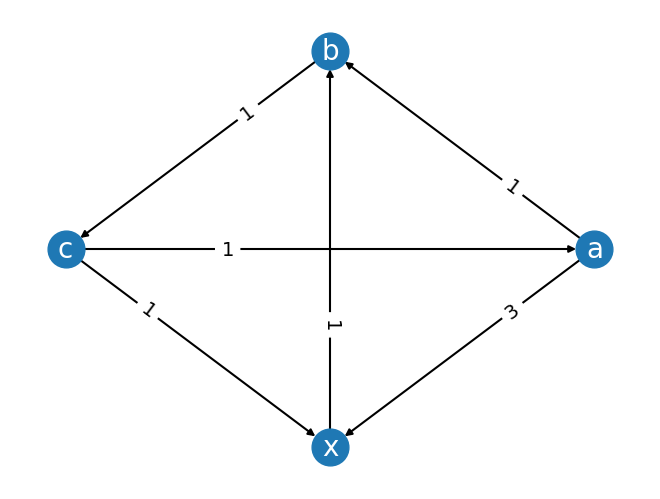

The number of voters that rank a above x is 3
GETCHA winners are {a, b, c, x}
GOCHA winners are {a, b, c, x}


In [14]:
x = 3
cmap = {a:"a", b:"b", c:"c", x:"x"}
prof = Profile(
    [
        [a, x, b, c], 
        [b, c, a, x], 
        [c, a, x, b]
    ],
    cmap = cmap
)

prof.display()
prof.display_margin_graph()
print(f"The number of voters that rank a above x is {prof.support(a, x)}")

getcha.display(prof)
gocha.display(prof)

## Example C.7 - GETCHA violates positive involvement

+---+---+
| 1 | 1 |
+---+---+
| a | c |
| b | a |
| c | b |
+---+---+


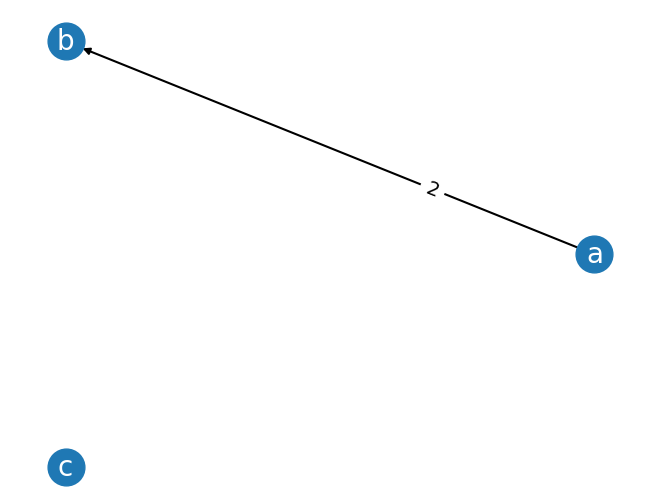

GETCHA winners are {a, b, c}

The profile after adding a voter with the ranking b a c
+---+---+---+
| 1 | 1 | 1 |
+---+---+---+
| a | c | b |
| b | a | a |
| c | b | c |
+---+---+---+


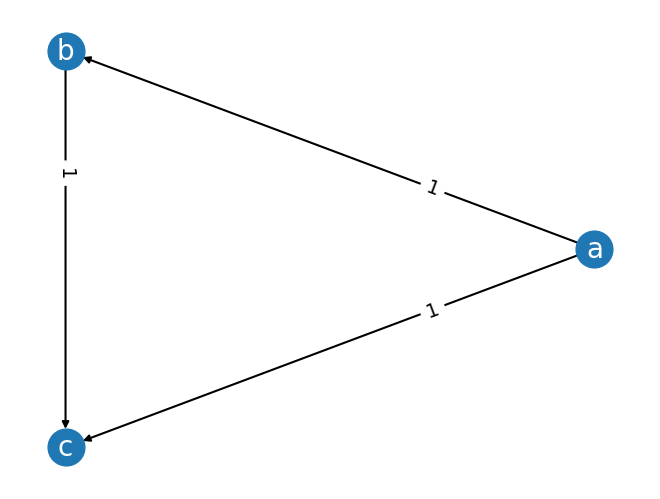

GETCHA winner is {a}

GETCHA violates positive involvement: 
b is ranked first by the voter, b is a winner in the first profile, but b is not a winner after the voter is added.


In [15]:
prof = Profile([[a, b, c], [c, a, b]], cmap=cmap_abc)

prof.display()
prof.display_margin_graph()

getcha.display(prof)

print("\nThe profile after adding a voter with the ranking b a c")
prof2 = Profile([[a, b, c], [c, a, b]] + [[b, a, c]], cmap=cmap_abc)

prof2.display()
prof2.display_margin_graph()

getcha.display(prof2)

print("\nGETCHA violates positive involvement: ")
print("b is ranked first by the voter, b is a winner in the first profile, but b is not a winner after the voter is added.")



## Example C.8 - GETCHA violates negative involvement 

+---+---+---+
| 1 | 1 | 1 |
+---+---+---+
| a | c | b |
| b | a | a |
| c | b | c |
+---+---+---+


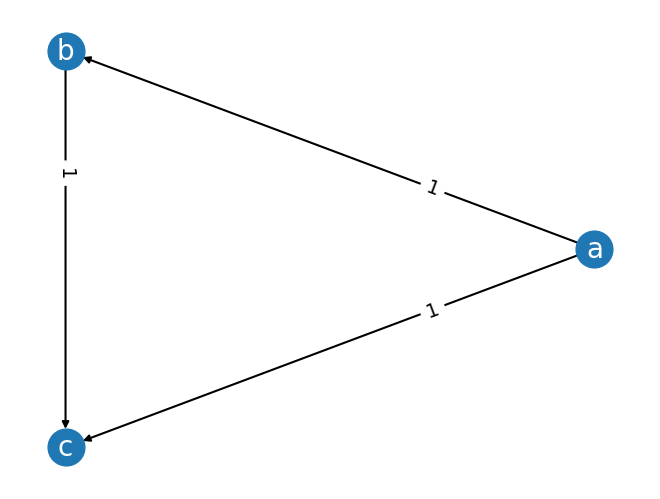

GETCHA winner is {a}

The profile after adding a voter with the ranking c a b
+---+---+---+---+
| 1 | 1 | 1 | 1 |
+---+---+---+---+
| a | c | b | c |
| b | a | a | a |
| c | b | c | b |
+---+---+---+---+


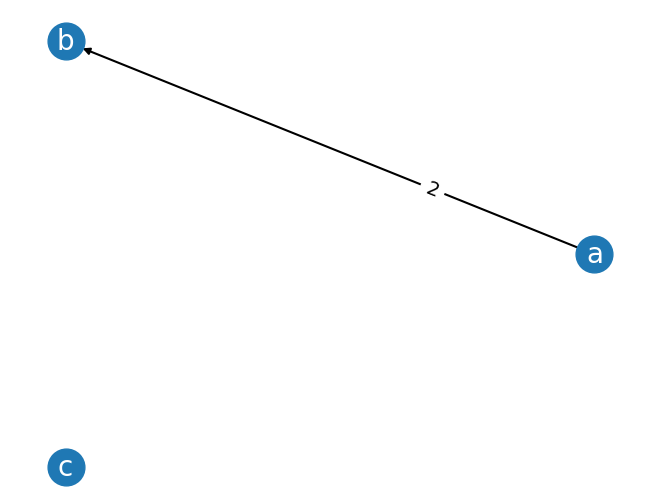

GETCHA winners are {a, b, c}

GETCHA violates negative involvement: 
b is ranked last by the voter, b is not a winner in the first profile, but b is a winner after the voter is added.


In [16]:
prof = Profile([[a, b, c], [c, a, b], [b, a, c]], cmap=cmap_abc)

prof.display()
prof.display_margin_graph()

getcha.display(prof)

print("\nThe profile after adding a voter with the ranking c a b")
prof2 = Profile([[a, b, c], [c, a, b], [b, a, c]] + [[c, a, b]], cmap=cmap_abc)

prof2.display()
prof2.display_margin_graph()

getcha.display(prof2)

print("\nGETCHA violates negative involvement: ")
print("b is ranked last by the voter, b is not a winner in the first profile, but b is a winner after the voter is added.")



## Example C.9 - GOCHA violates positive involvement

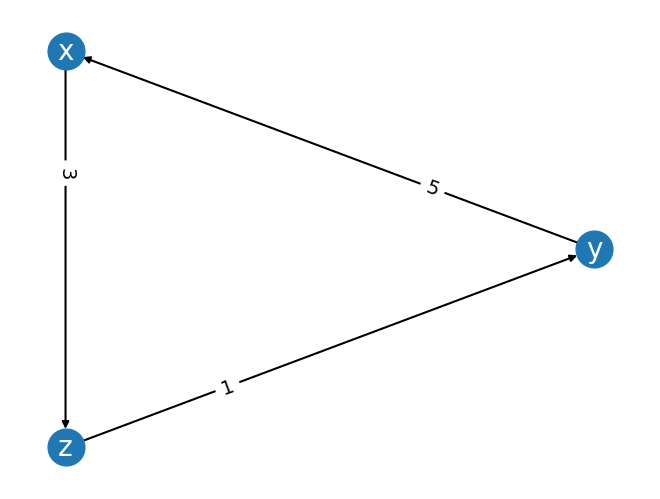

GOCHA winners are {x, y, z}

The margin graph after adding a voter with the ranking x y z


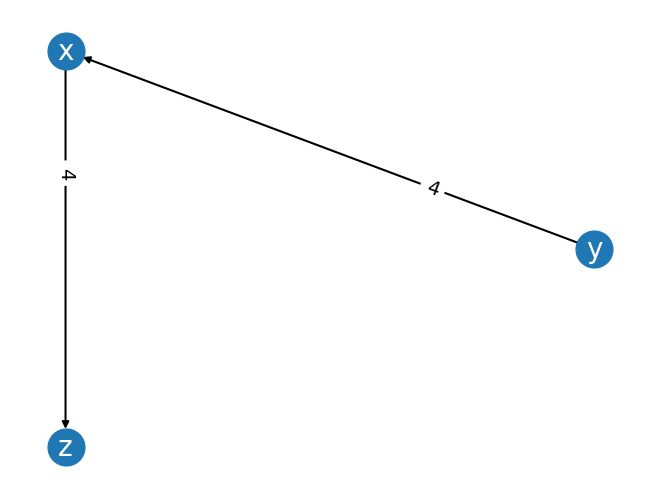

GOCHA winner is {y}


In [17]:
x = 0
y = 1
z = 2
cmap = {x:"x", y:"y", z:"z"}

mg = MarginGraph([y, x, z], [(y, x, 5), (x, z, 3), (z, y, 1)], cmap=cmap)

mg.display()
gocha.display(mg)

print("\nThe margin graph after adding a voter with the ranking x y z")
new_mg = mg + Profile([[x, y, z]]).margin_graph()

new_mg.display()

gocha.display(new_mg)


## Example C.10 - Uncovered Set (Fishburn Version) violates strong stability for winners

+---+---+---+---+---+---+
| 1 | 1 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+---+
| a | d | c | b | b | b |
| d | c | a | a | d | c |
| c | a | d | d | c | a |
| b | b | b | c | a | d |
+---+---+---+---+---+---+


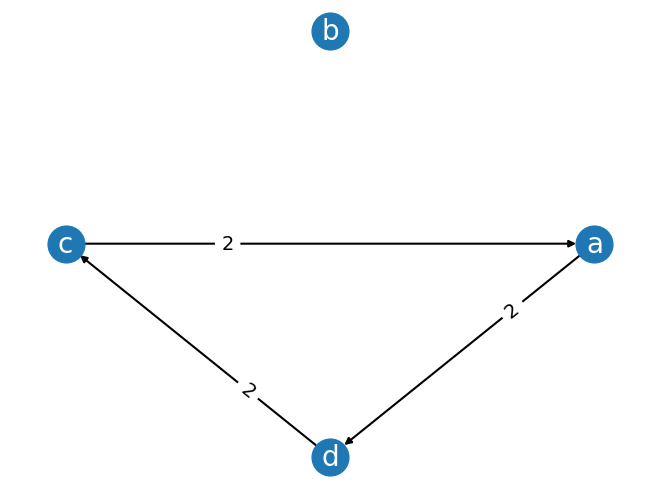

The margin of a over b is 0

Without b in the election, a is a winner:
Uncovered Set - Fishburn winners are {a, c, d}

With b in the election, a is not a winner:
Uncovered Set - Fishburn winner is {b}


In [18]:

prof = Profile(
    [
        [a, d, c, b],
        [d, c, a, b], 
        [c, a, d, b],
        [b, a, d, c], 
        [b, d, c, a],
        [b, c, a, d]
    ],
    cmap=cmap_abcd
)

prof.display()

prof.display_margin_graph()

print(f"The margin of a over b is {prof.margin(a,b)}")
print(f"\nWithout b in the election, a is a winner:")
uc_fish.display(prof, curr_cands = [a, c, d])

print(f"\nWith b in the election, a is not a winner:")

uc_fish.display(prof)



## Example C.12 - Uncovered Set (Fishburn Version) violates clone choice is independent of clones

In [19]:
prof = Profile(
    [
        [a, d, c, b],
        [d, c, a, b], 
        [c, a, d, b],
        [b, a, d, c], 
        [b, d, c, a],
        [b, c, a, d]
    ],
    cmap=cmap_abcd
)

prof.display()
print("{a, c, d} is a set of clone in the above profile.\n")


print("In the profile without a clone c, a clone a is a winner.")

uc_fish.display(prof, curr_cands = [a, b, d])


print("\nIn the profile, no clones are winners.")

uc_fish.display(prof)



+---+---+---+---+---+---+
| 1 | 1 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+---+
| a | d | c | b | b | b |
| d | c | a | a | d | c |
| c | a | d | d | c | a |
| b | b | b | c | a | d |
+---+---+---+---+---+---+
{a, c, d} is a set of clone in the above profile.

In the profile without a clone c, a clone a is a winner.
Uncovered Set - Fishburn winners are {a, b}

In the profile, no clones are winners.
Uncovered Set - Fishburn winner is {b}


## Example from Section C.8 showing Instant  Runoff violates Independence of Clones

In [20]:
prof = Profile(
    [
        [a, b, c],
        [b, c, a], 
        [c, b, a]
    ],
    rcounts = [4, 3, 3],
    cmap=cmap_abc
)

prof.display()
print("{b, c} is a set of clone in the above profile.\n")

instant_runoff.display(prof)

print("\nWithout the close c, the clone b is the winner: ")
prof = Profile(
    [
        [a, b],
        [b, a], 
        [b, a]
    ],
    rcounts = [4, 3, 3],
    cmap=cmap_abc
)

prof.display()

instant_runoff.display(prof)


+---+---+---+
| 4 | 3 | 3 |
+---+---+---+
| a | b | c |
| b | c | b |
| c | a | a |
+---+---+---+
{b, c} is a set of clone in the above profile.

Instant Runoff winner is {a}

Without the close c, the clone b is the winner: 
+---+---+---+
| 4 | 3 | 3 |
+---+---+---+
| a | b | b |
| b | a | a |
+---+---+---+
Instant Runoff winner is {b}
